# Монетизация мобильной игры


# Цель:

Основная цель проекта это интеграция монетизации в мобильную игру через показ рекламы. Компании необходимо начать получать прибыль, для дальнейшего развития. Для осуществления этой цели необходимо проанализировать игроков, проверить гипотезы, и сделать выводы. 

# Задача:

- Провести исследовательский анализ данных;

- Проанализировать влияние источника перехода в игру на поведение пользователя;
    
- Проанализировать поведение игроков во время игры;

- Узнать в какой момент игрового процессв нужно интегрировать рекламу;

- Понять какой источник привлечения новых пользователей самый эффектвный;

- Создать дашборд с основными метриками;

- Сделать презентацию с графиками и выводыми.

# Аббревиатуры:

## Датасет *game_actions.csv*:

- `event_datetime` — время события;
- `event` — одно из трёх событий:
    1. `building` — объект построен,
    2. `finished_stage_1` — первый уровень завершён,
    3. `project` — проект завершён;
- `building_type` — один из трёх типов здания:
    1. `assembly_shop` — сборочный цех,
    2. `spaceport` — космопорт,
    3. `research_center` — исследовательский центр;
- `user_id` — идентификатор пользователя;
- `project_type` — тип реализованного проекта;

## Датасет *ad_cost.csv*:

- `day` - день, в который был совершен клик по объявлению
- `source` - источник трафика
- `cost` - стоимость кликов

## Датасет user_source.csv:

- `user_id` - идентификатор пользователя
- `source` - источников, с которого пришёл пользователь, установивший приложение

# Оглавление:

[Вниз](#nine)<a id= 'ten'></a>

[Шаг 1. Предварительный анализ данных](#one)

[Шаг 2. Анализ источников переходов в игру](#two)

[Шаг 4. Оценить результаты A/B-тестирования](#four)

[Шаг 5. Исследование эффективности рекламных источников](#five)

[Ссылка на дашборд](#six)

[Презентация](#seven)

[Общий вывод](#eight)


<a id= 'one'></a>
# Шаг 1. 
# Предварительный анализ данных

In [1]:
import pandas as pd
!pip install -U seaborn
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st
import math as mth
import datetime as dt
from scipy.stats import mannwhitneyu
import scipy.stats as stats
from numpy import median
import plotly.express as px
from plotly import graph_objects as go
import matplotlib

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: seaborn in /home/jovyan/.local/lib/python3.7/site-packages (0.11.2)


- *Загрузим таблицы в юпитер*:

In [2]:
game = pd.read_csv('/datasets/game_actions.csv')

In [3]:
game.head()

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


In [4]:
ad_costs = pd.read_csv('/datasets/ad_costs.csv')

In [5]:
ad_costs

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796
5,facebook_ads,2020-05-08,68.009276
6,facebook_ads,2020-05-09,38.723350
7,instagram_new_adverts,2020-05-03,943.204717
8,instagram_new_adverts,2020-05-04,502.925451
9,instagram_new_adverts,2020-05-05,313.970984


In [6]:
users = pd.read_csv('/datasets/user_source.csv')

In [7]:
users.head()

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


- *Проверим данные на пропуски, дубликаты и правильность тип данных*:

In [8]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
event_datetime    135640 non-null object
event             135640 non-null object
building_type     127957 non-null object
user_id           135640 non-null object
project_type      1866 non-null object
dtypes: object(5)
memory usage: 5.2+ MB


In [9]:
game['event_datetime'] = pd.to_datetime(game['event_datetime'])

In [10]:
print('Количество дубликатов:', game.duplicated().sum())

Количество дубликатов: 1


In [11]:
game.drop_duplicates().reset_index(drop = True)

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN
...,...,...,...,...,...
135634,2020-06-05 00:08:06,building,research_center,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN
135635,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN
135636,2020-06-05 08:57:52,building,research_center,ed3e7d02-8a96-4be7-9998-e9813ff9c316,NaN
135637,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN


In [12]:
game['project_type'].unique()

array([nan, 'satellite_orbital_assembly'], dtype=object)

In [13]:
game['user_id'].nunique()

13576

В таблице game_actions.csv много пропусков, их нельзя удалять и они связаны с тем, что в таблице собранные все действия разных игроков. Всего уникальных игроков 13576, а строк 135640. Также поменял тип данных для столбца event_datetime на нужный. Нашел один дубликат, решил его удалить.

In [14]:
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
source    28 non-null object
day       28 non-null object
cost      28 non-null float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


In [15]:
ad_costs['day'] = pd.to_datetime(ad_costs['day'])

В таблице ad_costs не обнаружилось пропусков, только поменял тип данных стоблца 'day' на нужный.

In [16]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
user_id    13576 non-null object
source     13576 non-null object
dtypes: object(2)
memory usage: 212.2+ KB


In [17]:
users.duplicated().sum()

0

Таблица user_source.csv впорядке, ничего для исправлений не обнаружил.

<a id= 'two'></a>
# Шаг 2. 

# Анализ источников переходов в игру

In [18]:
ad_costs['source'].unique()

array(['facebook_ads', 'instagram_new_adverts', 'yandex_direct',
       'youtube_channel_reklama'], dtype=object)

In [19]:
# Объеденение таблиц
game_users = users.merge(game, on = 'user_id')

In [20]:
game_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135640 entries, 0 to 135639
Data columns (total 6 columns):
user_id           135640 non-null object
source            135640 non-null object
event_datetime    135640 non-null datetime64[ns]
event             135640 non-null object
building_type     127957 non-null object
project_type      1866 non-null object
dtypes: datetime64[ns](1), object(5)
memory usage: 7.2+ MB


In [21]:
game_users.head()

,user_id,source,event_datetime,event,building_type,project_type
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads,2020-05-06 01:07:37,building,assembly_shop,NaN
1,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads,2020-05-06 11:31:56,building,assembly_shop,NaN
2,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads,2020-05-06 15:11:50,building,assembly_shop,NaN
3,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads,2020-05-09 05:59:57,building,assembly_shop,NaN
4,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads,2020-05-09 07:35:40,building,assembly_shop,NaN


In [22]:
game_users['day'] = game_users['event_datetime'].astype('datetime64[D]')

In [23]:
dau_data = game_users.copy(deep=True)
dau_data['day'] = dau_data['day'].dt.strftime('%Y-%m-%d')

In [24]:
dau = dau_data.pivot_table(index= ['day'], columns = 'source', values = 'user_id', aggfunc = 'nunique')

In [25]:
dau

source,facebook_ads,instagram_new_adverts,yandex_direct,youtube_channel_reklama
day,,,,
2020-05-04,1184.0,1452.0,2078.0,1146.0
2020-05-05,1328.0,1539.0,2291.0,1224.0
2020-05-06,1389.0,1670.0,2445.0,1350.0
2020-05-07,1535.0,1802.0,2613.0,1434.0
2020-05-08,1583.0,1962.0,2784.0,1562.0
2020-05-09,1700.0,2077.0,2958.0,1659.0
2020-05-10,1860.0,2301.0,3271.0,1787.0
2020-05-11,1278.0,1432.0,2163.0,1122.0
2020-05-12,1153.0,1457.0,2030.0,1136.0


In [26]:
#ad_data = dau.merge(ad_costs, on = ['day', 'source'], how = 'left')

In [27]:
#ad_data

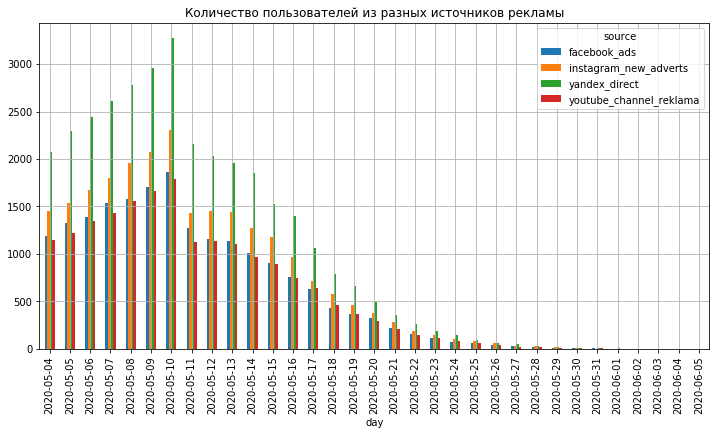

In [28]:
dau.plot.bar(title = 'Количество пользователей из разных источников рекламы', figsize = (12, 6), grid = True)

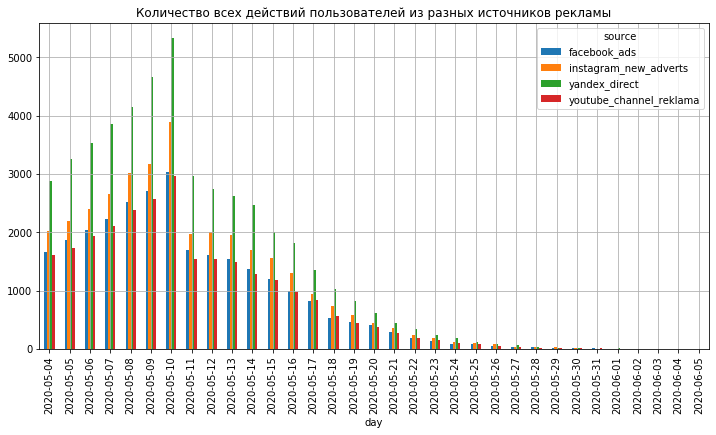

In [29]:
activity = dau_data.pivot_table(index= ['day'], columns = 'source', values = 'user_id', aggfunc = 'count')
activity.plot.bar(title = 'Количество всех действий пользователей из разных источников рекламы', figsize = (12, 6), grid = True)

Для анализа активности пользователей, пришедших из разных источников, было необходимо объединить таблицы. Далее сгруппировать таблицы по количеству уникальных пользователей, и построить графики, чтоб легче их сравнить. Как оказалось, самое большое количество игроков пришло с yandex_direct, отрыв от всех остальных значителен. На втором месте это инстаграм, и примерно одинаковы источники с ютуба и фейсбука. Также видно, что количество пользователей падает после 2020-05-10.

Из-за этого я решил проверить общее количество действий игроков в зависимости от дня, и мы видим, что пока был маркетинговый бюджет, приходили новые пользователи и совершали различные действия в игре, но после окончания маркетинга, приток новых пользователей остановился, а игроки начали совершать меньше и меньше действий. Другими словами, игроки начали покидать игру. Необходимо высчитать коэффициент оттока.

In [30]:
#Общий retention rate

first_activity_date = game_users.groupby(['user_id'])['day'].min()
first_activity_date.name = 'first_activity_day'
user_activity = game_users.join(first_activity_date,on='user_id')

In [31]:
user_activity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135640 entries, 0 to 135639
Data columns (total 8 columns):
user_id               135640 non-null object
source                135640 non-null object
event_datetime        135640 non-null datetime64[ns]
event                 135640 non-null object
building_type         127957 non-null object
project_type          1866 non-null object
day                   135640 non-null datetime64[ns]
first_activity_day    135640 non-null datetime64[ns]
dtypes: datetime64[ns](3), object(5)
memory usage: 9.3+ MB


In [32]:
user_activity['cohort_lifetime'] = (user_activity['day'] - user_activity['first_activity_day'])
user_activity['cohort_lifetime'] = user_activity['cohort_lifetime'] / np.timedelta64(1, 'D')
user_activity['cohort_lifetime'] = user_activity['cohort_lifetime'].astype('int') 

In [33]:
cohorts = user_activity.groupby(['first_activity_day','cohort_lifetime']).agg({'user_id':'nunique'}).reset_index() 

In [34]:
cohorts

,first_activity_day,cohort_lifetime,user_id
0,2020-05-04,0,5860
1,2020-05-04,1,3021
2,2020-05-04,2,3204
3,2020-05-04,3,3412
4,2020-05-04,4,3564
...,...,...,...
194,2020-05-10,19,7
195,2020-05-10,20,3
196,2020-05-10,21,1
197,2020-05-10,22,1


In [35]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_day', 'user_id']]

initial_users_count = initial_users_count.rename(columns={'user_id':'cohort_users'})

cohorts = cohorts.merge(initial_users_count,on='first_activity_day')

cohorts['retention'] = cohorts['user_id']/cohorts['cohort_users'] 

cohorts['first_activity_day'] = cohorts['first_activity_day'].dt.strftime('%Y-%m-%d')

retention_pivot = cohorts.pivot_table(
    index='first_activity_day',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
)

In [36]:
retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
first_activity_day,,,,,,,,,,,,,,,,,,,,,
2020-05-04,1.0,0.515529,0.546758,0.582253,0.608191,0.641297,0.710068,0.465529,0.427304,0.405973,...,0.007338,0.004949,0.003242,0.002048,0.001024,0.000683,0.000341,0.000171,0.000341,0.000341
2020-05-05,1.0,0.536447,0.566201,0.612318,0.634633,0.687891,0.472776,0.451056,0.408807,0.380839,...,0.006843,0.004760,0.002678,0.002380,0.000893,0.000595,0.000298,NaN,NaN,NaN
2020-05-06,1.0,0.519762,0.551164,0.605306,0.662696,0.434218,0.443963,0.434759,0.371413,0.332431,...,0.004873,0.005414,0.002166,0.001624,0.001624,0.002166,0.000541,0.000541,0.000541,NaN
2020-05-07,1.0,0.507665,0.552750,0.599639,0.382326,0.400361,0.459874,0.390442,0.329125,0.291253,...,0.009919,0.006312,0.002705,0.005410,0.002705,0.002705,0.002705,0.002705,NaN,NaN
2020-05-08,1.0,0.482558,0.545058,0.351744,0.380814,0.414244,0.440407,0.376453,0.261628,0.312500,...,0.004360,0.007267,0.001453,NaN,0.002907,0.001453,NaN,NaN,NaN,NaN
2020-05-09,1.0,0.479545,0.320455,0.338636,0.436364,0.390909,0.420455,0.381818,0.270455,0.215909,...,0.006818,0.002273,0.002273,0.002273,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-10,1.0,0.254613,0.298893,0.328413,0.339483,0.413284,0.435424,0.369004,0.210332,0.210332,...,0.003690,0.003690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


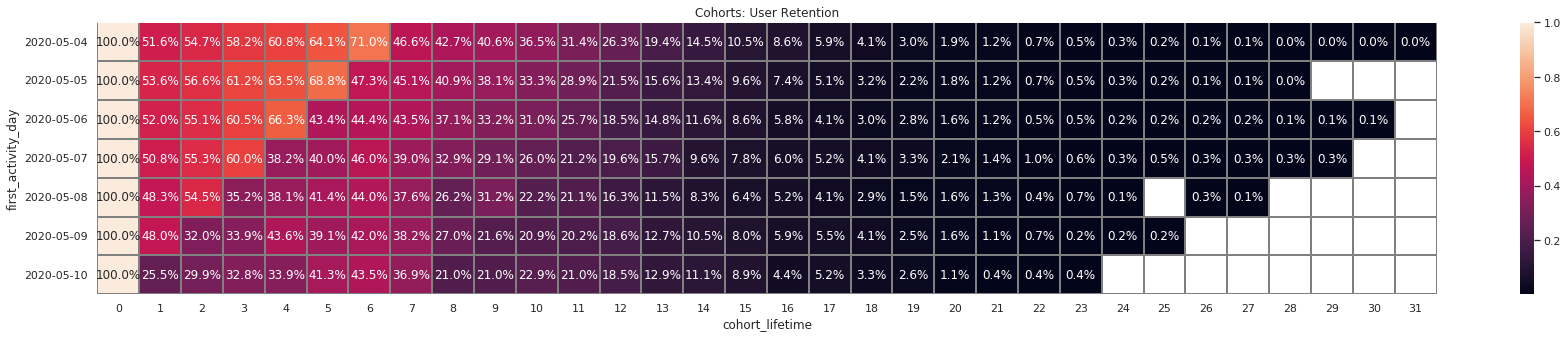

In [37]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style='white')
plt.figure(figsize=(30, 5))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray');

Высчитав коэффициент оттока пользователей за месяц, хорошо видно, что первые 9 дней были самые оживлённые в игре, в это же время шла маркетинговая кампания в социальных сетях. Дальше коэффициент удержания постоянно падает и очень сильно. Судя посему, игра на первых этапах интересная, или много людей достигает первого уровня или игру забрасывают.

Так же интересно, что коэффициент повышался в какие-то дни относительно предыдущего. Это может быть связанно с разными причинами, например, так как стройка занимает время то игроки возвращались в игру, чтоб проверить стройку.

# Проверка гипотезы

Появилась гипотеза, что коэффициент удержания (retention rate) не различается в зависимости от источника рекламного трафика.

- Нулевая гипотеза: коэффициент удержания не различается в зависимости откуда пришли пользователями


- Единичная гипотеза: коэффициент удержания не различается в зависимости откуда пришли пользователи 

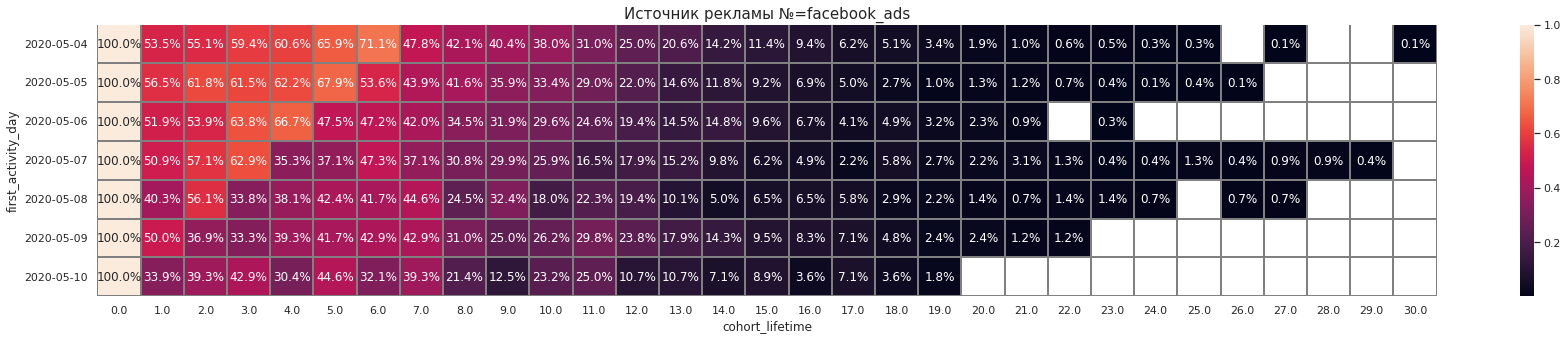

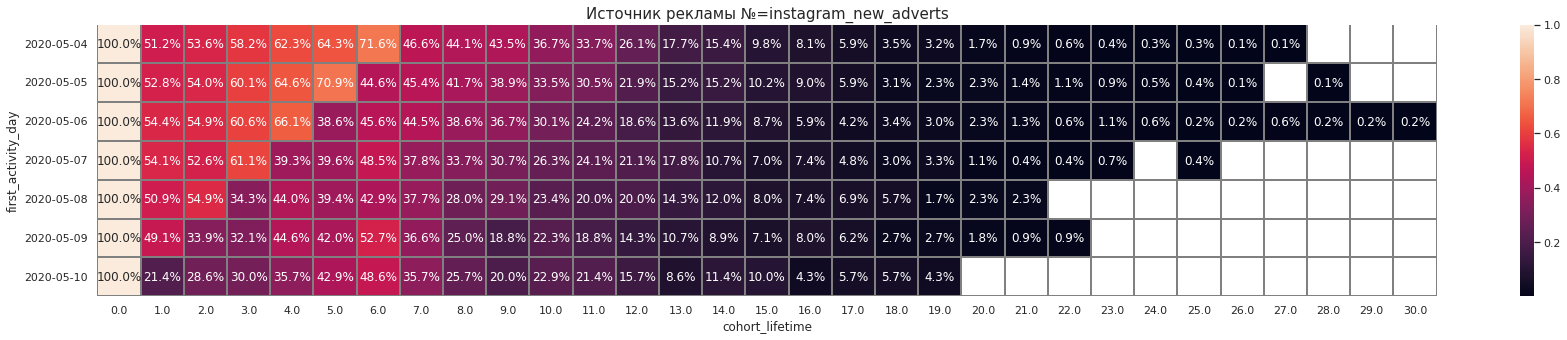

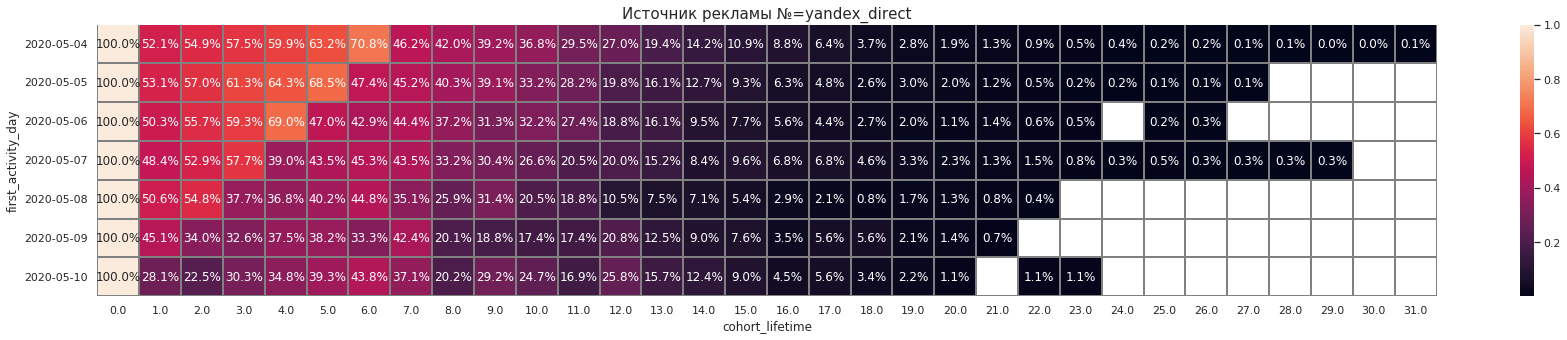

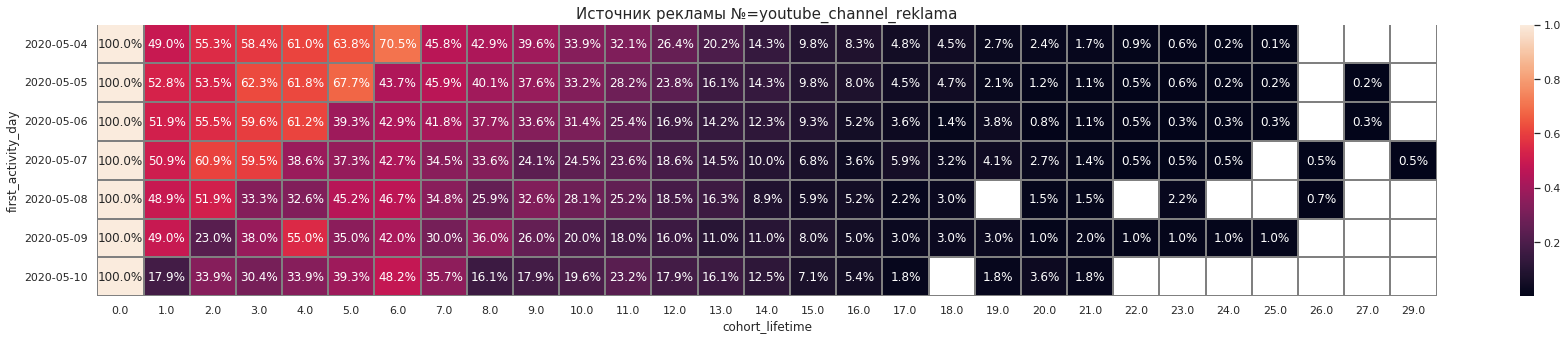

In [38]:
#Общий retention rate
for ad_source in ['facebook_ads', 'instagram_new_adverts', 'yandex_direct', 'youtube_channel_reklama']:

    source_data = game_users.query('source == @ad_source')
    first_activity_date = source_data.groupby(['user_id'])['day'].min()
    first_activity_date.name = 'first_activity_day'
    user_activity = game_users.join(first_activity_date,on='user_id')
    user_activity['cohort_lifetime'] = (user_activity['day'] - user_activity['first_activity_day'])
    user_activity['cohort_lifetime'] = user_activity['cohort_lifetime'] / np.timedelta64(1, 'D')
    user_activity['cohort_lifetime'] = user_activity['cohort_lifetime']
    cohorts = user_activity.groupby(['first_activity_day','cohort_lifetime']).agg({'user_id':'nunique'}).reset_index()
    initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_day', 'user_id']]

    initial_users_count = initial_users_count.rename(columns={'user_id':'cohort_users'})

    cohorts = cohorts.merge(initial_users_count,on='first_activity_day')

    cohorts['retention'] = cohorts['user_id']/cohorts['cohort_users'] 

    cohorts['first_activity_day'] = cohorts['first_activity_day'].dt.strftime('%Y-%m-%d')

    retention_pivot = cohorts.pivot_table(
        index='first_activity_day',
        columns='cohort_lifetime',
        values='retention',
        aggfunc='sum',
    )
    sns.set(style='white')
    plt.figure(figsize=(30, 5))
    plt.title('Источник рекламы №={}'.format(ad_source), fontsize = 15)
    sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray');

In [39]:
def ad_comp(ad_source):

    source_data = game_users.query('source == @ad_source')
    first_activity_date = source_data.groupby(['user_id'])['day'].min()
    first_activity_date.name = 'first_activity_day'
    user_activity = game_users.join(first_activity_date,on='user_id')
    user_activity['cohort_lifetime'] = (user_activity['day'] - user_activity['first_activity_day'])
    user_activity['cohort_lifetime'] = user_activity['cohort_lifetime'] / np.timedelta64(1, 'D')
    user_activity['cohort_lifetime'] = user_activity['cohort_lifetime']
    cohorts = user_activity.groupby(['first_activity_day','cohort_lifetime']).agg({'user_id':'nunique'}).reset_index()
    initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_day', 'user_id']]

    initial_users_count = initial_users_count.rename(columns={'user_id':'cohort_users'})

    cohorts = cohorts.merge(initial_users_count,on='first_activity_day')

    cohorts['retention'] = cohorts['user_id']/cohorts['cohort_users'] 

    cohorts['first_activity_day'] = cohorts['first_activity_day'].dt.strftime('%Y-%m-%d')

    retention_group = cohorts.groupby('cohort_lifetime').agg({'retention' : 'mean'})
    
    return retention_group

In [40]:
#Появилась гипотеза, что коэффициент удержания (retention rate) не различается в зависимости от источника рекламного трафика.
#Нулевая гипотеза: коэффициент удержания не различается в зависимости откуда пришли пользователями
#Единичная гипотеза: коэффициент удержания различается в зависимости откуда пришли пользователи
yandex = ad_comp('yandex_direct')
youtube = ad_comp('youtube_channel_reklama')
alpha = .05
results = st.ttest_ind(yandex, youtube)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [0.74084859]
Не получилось отвергнуть нулевую гипотезу


Решил проверить два источника, где яндекс является лидером по притоку новых клиентов, а ютуб наоборот на последнем месте по притоку. Стало интересно, влияет ли проток на удержание и как оказалось, что нет. Таким образом, источник не влияет на коэффициент удержания.

<a id= 'three'></a>
# Шаг 3.

# Анализ поведения игроков

In [41]:
#Процент игроков проходит до первого уровня
print('Общее количество уникальных игроков:', game_users['user_id'].nunique())
print('Общее количество уникальных игроков дошедших до первого уровня:', game_users.query("event =='finished_stage_1'")['user_id'].nunique())
print('Процент уникальных игроков дошедших до первого уровня: {:.0%}'.format(game_users.query("event =='finished_stage_1'")['user_id'].nunique() / game_users['user_id'].nunique()))


Общее количество уникальных игроков: 13576
Общее количество уникальных игроков дошедших до первого уровня: 5817
Процент уникальных игроков дошедших до первого уровня: 43%


За 30 дней игроки которые пришли с 4ого по 10ое мая, 43% игорокв доходят до первого уровня, другими словами в первые же этапы игры 57% пришедших игроков не зацепила игра. С другой стороны игроки могли не успеть реализовать проект, который нужен для получения первого уровня. 

In [42]:
game_users['project_type'].unique()

array([nan, 'satellite_orbital_assembly'], dtype=object)

Пройти первый уровень можно двумя способами, или победить врага или реализовать проект орбитальной сборки спутников. Чтоб понять как кто добрался до первого уровня, можно предположить, что если игрок получил первый уровень, но не завершил проект, то он победил врага, а если есть орбитальная сборка спутников, то он завершил проект через завершение проекта.

In [43]:
print('Общее количество уникальных игроков завершив проект орбитальной сборки спутников:', game_users.query("project_type =='satellite_orbital_assembly'")['user_id'].nunique())
print('Процент уникальных игроков дошедших до первого уровня при помощи завершение проекта: {:.0%}'.format(game_users.query("project_type =='satellite_orbital_assembly'")['user_id'].nunique() / game_users.query("event =='finished_stage_1'")['user_id'].nunique()))

Общее количество уникальных игроков завершив проект орбитальной сборки спутников: 1866
Процент уникальных игроков дошедших до первого уровня при помощи завершение проекта: 32%


32% игроков предпочитают не воевать а завершать проект, а 68% игроков побеждают врагов.

In [44]:
#Процент игроков игроков завершающие строительства
print('Общее количество уникальных игроков построивших хотя бы одно здание:', game_users.query("building_type =='assembly_shop' or building_type =='spaceport' or building_type =='research_center'")['user_id'].nunique())
print('Общее количество уникальных игроков построившие все возможные здания:', game_users.query("building_type =='assembly_shop' and building_type =='spaceport' and building_type =='research_center'")['user_id'].nunique())

Общее количество уникальных игроков построивших хотя бы одно здание: 13576
Общее количество уникальных игроков построившие все возможные здания: 0


Интересно, что все уникальные пользователи построили хотя бы одно, даже те кто не дошел до первого уровня, но, чтоб построить все 3 сразу ни одного не нашлось.

# Проверка гипотезы

Появилась еще одна гипотеза, что время завершения уровня не различается в зависимости способа прохождения.

- Нулевая гипотеза: Время завершения уровня не различается в зависимости от способа прохождения

- Единичная гипотеза: Время завершения уровня различается в зависимости от способа прохождения

In [45]:
first_activity_date = game_users.groupby(['user_id'])['event_datetime'].min()
first_activity_date.name = 'first_activity_date'
activity_users = game_users.join(first_activity_date,on='user_id')

In [46]:
build_sat = activity_users.query("project_type =='satellite_orbital_assembly'").reset_index(drop =True)

In [47]:
build_sat.head()

,user_id,source,event_datetime,event,building_type,project_type,day,first_activity_date
0,006380d6-67a6-45de-ab1e-6eb54ad8dbe8,youtube_channel_reklama,2020-05-16 02:43:11,project,NaN,satellite_orbital_assembly,2020-05-16,2020-05-04 16:43:39
1,00be7371-fa79-4fbd-b8e7-8ba32e3f8f82,instagram_new_adverts,2020-05-21 00:01:46,project,NaN,satellite_orbital_assembly,2020-05-21,2020-05-08 21:57:44
2,00c2b9f2-2615-439c-aed0-6974e4c6c1c1,youtube_channel_reklama,2020-05-26 13:36:50,project,NaN,satellite_orbital_assembly,2020-05-26,2020-05-07 10:26:09
3,00de2809-403e-4476-a2f7-ca1b11700190,instagram_new_adverts,2020-05-18 09:33:27,project,NaN,satellite_orbital_assembly,2020-05-18,2020-05-04 07:48:50
4,00e83261-5fd4-4939-9616-802b5a0202c6,yandex_direct,2020-05-17 09:23:11,project,NaN,satellite_orbital_assembly,2020-05-17,2020-05-05 15:49:57


Для среза игроков которые завершили первый уровень за счет строительства орбитальной сборки спутников, решил просто задать условие окончание проект. Так как завершение проекта = выполнение первого уровня, то значит на время не должно сильно повлиять.

In [48]:
user_ev = game_users.groupby('event').agg({'user_id' : 'nunique'})

In [49]:
user_ev

,user_id
event,
building,13576
finished_stage_1,5817
project,1866


In [50]:
df = game_users.groupby('user_id')['event'].unique()

In [51]:
df

user_id
0001f83c-c6ac-4621-b7f0-8a28b283ac30                               [building]
00151b4f-ba38-44a8-a650-d7cf130a0105                               [building]
001aaea6-3d14-43f1-8ca8-7f48820f17aa                               [building]
001d39dc-366c-4021-9604-6a3b9ff01e25             [building, finished_stage_1]
002f508f-67b6-479f-814b-b05f00d4e995                               [building]
                                                        ...                  
ffef4fed-164c-40e1-bde1-3980f76d0fb5             [building, finished_stage_1]
fffab3da-da0e-4e30-ae62-10d0a2e24a4e                               [building]
fffb626c-5ab6-47c9-8113-2062a2f18494             [building, finished_stage_1]
ffff194a-56b7-4c12-860d-3485242ae7f5                               [building]
ffff69cc-fec1-4fd3-9f98-93be1112a6b8    [building, project, finished_stage_1]
Name: event, Length: 13576, dtype: object

In [52]:
uni_df = pd.DataFrame({'user_id':df.index, 'event':df.values})

In [53]:
uni_df['event']=uni_df["event"].apply(" ".join)

In [54]:
uni_df

,user_id,event
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,building
1,00151b4f-ba38-44a8-a650-d7cf130a0105,building
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,building
3,001d39dc-366c-4021-9604-6a3b9ff01e25,building finished_stage_1
4,002f508f-67b6-479f-814b-b05f00d4e995,building
...,...,...
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,building finished_stage_1
13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,building
13573,fffb626c-5ab6-47c9-8113-2062a2f18494,building finished_stage_1
13574,ffff194a-56b7-4c12-860d-3485242ae7f5,building


In [55]:
uni_df['event'].unique()

array(['building', 'building finished_stage_1',
       'building project finished_stage_1'], dtype=object)

In [56]:
uni_df_query = uni_df.query("event == 'building finished_stage_1'")

In [57]:
uni_df_query.set_axis(['user_id', 'enemy_win'], axis = 'columns', inplace = True)

In [58]:
uni_df_query

,user_id,enemy_win
3,001d39dc-366c-4021-9604-6a3b9ff01e25,building finished_stage_1
6,003ee7e8-6356-4286-a715-62f22a18d2a1,building finished_stage_1
7,004074f8-251a-4776-922c-8348dca1a2f6,building finished_stage_1
9,00464e5e-28ed-4be6-bf44-517ef7b3937b,building finished_stage_1
10,0056c007-c082-43cc-bdef-afc49bca4cb9,building finished_stage_1
...,...,...
13566,ffc6f4fa-3476-47af-85cb-e2ee0551110a,building finished_stage_1
13568,ffd002f3-3545-423e-8dba-0c6a2d48a3aa,building finished_stage_1
13570,ffe810f4-1a1f-464b-924d-6f120b0cb8df,building finished_stage_1
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,building finished_stage_1


Получил таблицу с уникальными пользователями которые прошли первый уровень убив врага.

In [59]:
win_en = activity_users.merge(uni_df_query, on = 'user_id', how = 'left')

In [60]:
win_en_query = win_en.query("enemy_win == 'building finished_stage_1' and event == 'finished_stage_1'").reset_index(drop = True)

In [61]:
win_en_query.head()

,user_id,source,event_datetime,event,building_type,project_type,day,first_activity_date,enemy_win
0,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts,2020-05-12 07:40:47,finished_stage_1,NaN,NaN,2020-05-12,2020-05-05 21:02:05,building finished_stage_1
1,003ee7e8-6356-4286-a715-62f22a18d2a1,instagram_new_adverts,2020-05-17 21:47:49,finished_stage_1,NaN,NaN,2020-05-17,2020-05-05 08:31:04,building finished_stage_1
2,004074f8-251a-4776-922c-8348dca1a2f6,facebook_ads,2020-05-16 19:57:40,finished_stage_1,NaN,NaN,2020-05-16,2020-05-04 01:07:35,building finished_stage_1
3,00464e5e-28ed-4be6-bf44-517ef7b3937b,yandex_direct,2020-05-15 16:02:01,finished_stage_1,NaN,NaN,2020-05-15,2020-05-04 08:35:29,building finished_stage_1
4,0056c007-c082-43cc-bdef-afc49bca4cb9,instagram_new_adverts,2020-05-16 13:48:39,finished_stage_1,NaN,NaN,2020-05-16,2020-05-10 11:49:47,building finished_stage_1


In [62]:
#Timedelta
build_sat['time_delta'] = build_sat['event_datetime'] - build_sat['first_activity_date']
build_sat['time_delta'] = pd.to_datetime(build_sat['time_delta'])
build_sat['time_delta'] = build_sat['time_delta'].dt.day
build_sat_time = build_sat['time_delta']

In [63]:
win_en_query['time_delta'] = win_en_query['event_datetime'] - win_en_query['first_activity_date']
win_en_query['time_delta'] = pd.to_datetime(win_en_query['time_delta'])
win_en_query['time_delta'] = win_en_query['time_delta'].dt.day
win_en_time = win_en_query['time_delta']

In [64]:
#Проверка гипотезы
#Нулевая гипотеза: Время завершения уровня не различается в зависимости от способа прохождения
#Единичная гипотеза: Время завершения уровня различается в зависимости от способа прохождения

alpha = .05
results = st.ttest_ind(build_sat_time, win_en_time)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.7313504105449557e-12
Отвергаем нулевую гипотезу


In [65]:
print('Среднее время затраченное на прохождение уровня при помощи заершения проекта: {} дней'.format(build_sat_time.mean().round(2)))

Среднее время затраченное на прохождение уровня при помощи заершения проекта: 12.39 дней


In [66]:
print('Среднее время затраченное на прохождение уровня при победе над врагом: {} дней'.format(win_en_time.mean().round(2)))

Среднее время затраченное на прохождение уровня при победе над врагом: 11.61 дней


Подводя итоги, стало ясно, что игроки предпочитают побеждать врага, чтоб завершить уровень. Но на время прохождения уровня это влияет, оба типа игроков завершают его за разное время. Оказалось, чтоб закончить первый уровень при помощи победы над врагом в среднем у игроков получается быстрей, чем при завершении проекта, разница составляет чуть меньше дня.

<a id= 'four'></a>
# Шаг 4.

# Интеграция рекламы


Из прошлого шага стало понятно, что игра интересует пользователей и ее можно монетизировать. Для этого надо понять, что наша игра является стратегической и заключается в том, что нужно воевать с врагами и строить различные сооружения. Мы знаем, что практически все пользователи, которые даже те, кто не завершил первый уровень построили хотя бы одно здание. Таким образом не нужно заново придумывать велосипед, нужно посмотреть на опыт конкурентов. В таких играх как наша, ставится реклама в момент радостного события для игрока, построенного здания, побежденного врага, завершенного уровня. В этот радостный момент игрок с большей вероятностью кликнет на рекламу, а деньги разработчики получают в основном с кликов. Далее в игре очень важны ресурсы для строительства, таким образом предлагаю во время отсутствия игрока давать накапливать ресурсы. Это поможет с удержанием игрока в игре, за счет бонуса, который пользователь при входе в игру будет получать, а также дадим выбор игроку удвоить количества ресурсов, если посмотрит рекламу. Еще один тип монетизации, который часто используется, это во время игры если у игрока не хватает не большое количества какого-нибудь ресурса (разработчики пускай сами решают какого конкретно), то пользователь может посмотреть рекламу и получить ресурс.

Важно не вставлять рекламу во время игрового процесса, во время битвы или строительства. Игрок сконцентрирован на самом геймплее, и реклама его только будет раздражать и кликабельность рекламы упадет. Хуже этого, игрок начнет раздражение испытывать к самой игре, что может сказаться на удержании игроков.

<a id= 'five'></a>
# Шаг 5. 

# Исследование эффективности рекламных источников

In [67]:
total_num = game_users.groupby('source').agg({'user_id' : 'nunique'})

In [68]:
total_num

,user_id
source,
facebook_ads,2726
instagram_new_adverts,3347
yandex_direct,4817
youtube_channel_reklama,2686


Вообщем самое большое количество людей пришло с яндекса.

In [69]:
ad_costs

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796
5,facebook_ads,2020-05-08,68.009276
6,facebook_ads,2020-05-09,38.723350
7,instagram_new_adverts,2020-05-03,943.204717
8,instagram_new_adverts,2020-05-04,502.925451
9,instagram_new_adverts,2020-05-05,313.970984


In [70]:
first_activity_date = game_users.groupby(['user_id'])['day'].min()
first_activity_date.name = 'first_activity_date'
game_users = game_users.drop(['day'], axis =1)
game_users = game_users.join(first_activity_date,on='user_id')

In [71]:
users_entry = game_users.query("'2020-05-02' < first_activity_date < '2020-05-11' and '2020-05-02' < event_datetime < '2020-05-11'").reset_index(drop =True)

In [72]:
users_entry

,user_id,source,event_datetime,event,building_type,project_type,first_activity_date
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads,2020-05-06 01:07:37,building,assembly_shop,NaN,2020-05-06
1,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads,2020-05-06 11:31:56,building,assembly_shop,NaN,2020-05-06
2,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads,2020-05-06 15:11:50,building,assembly_shop,NaN,2020-05-06
3,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads,2020-05-09 05:59:57,building,assembly_shop,NaN,2020-05-06
4,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads,2020-05-09 07:35:40,building,assembly_shop,NaN,2020-05-06
...,...,...,...,...,...,...,...
78400,ffff194a-56b7-4c12-860d-3485242ae7f5,instagram_new_adverts,2020-05-10 07:48:40,building,assembly_shop,NaN,2020-05-04
78401,ffff194a-56b7-4c12-860d-3485242ae7f5,instagram_new_adverts,2020-05-10 09:19:35,building,assembly_shop,NaN,2020-05-04
78402,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,facebook_ads,2020-05-08 06:57:30,building,assembly_shop,NaN,2020-05-08
78403,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,facebook_ads,2020-05-09 06:00:38,building,assembly_shop,NaN,2020-05-08


In [73]:
users_entry['day_minus'] = users_entry['first_activity_date'] - np.timedelta64(1,'D')

In [74]:
all_data = users_entry.merge(ad_costs, left_on = ['day_minus', 'source'], right_on = ['day', 'source'], how = 'left')

In [75]:
all_data

,user_id,source,event_datetime,event,building_type,project_type,first_activity_date,day_minus,day,cost
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads,2020-05-06 01:07:37,building,assembly_shop,NaN,2020-05-06,2020-05-05,2020-05-05,260.185754
1,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads,2020-05-06 11:31:56,building,assembly_shop,NaN,2020-05-06,2020-05-05,2020-05-05,260.185754
2,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads,2020-05-06 15:11:50,building,assembly_shop,NaN,2020-05-06,2020-05-05,2020-05-05,260.185754
3,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads,2020-05-09 05:59:57,building,assembly_shop,NaN,2020-05-06,2020-05-05,2020-05-05,260.185754
4,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads,2020-05-09 07:35:40,building,assembly_shop,NaN,2020-05-06,2020-05-05,2020-05-05,260.185754
...,...,...,...,...,...,...,...,...,...,...
78400,ffff194a-56b7-4c12-860d-3485242ae7f5,instagram_new_adverts,2020-05-10 07:48:40,building,assembly_shop,NaN,2020-05-04,2020-05-03,2020-05-03,943.204717
78401,ffff194a-56b7-4c12-860d-3485242ae7f5,instagram_new_adverts,2020-05-10 09:19:35,building,assembly_shop,NaN,2020-05-04,2020-05-03,2020-05-03,943.204717
78402,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,facebook_ads,2020-05-08 06:57:30,building,assembly_shop,NaN,2020-05-08,2020-05-07,2020-05-07,111.766796
78403,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,facebook_ads,2020-05-09 06:00:38,building,assembly_shop,NaN,2020-05-08,2020-05-07,2020-05-07,111.766796


In [76]:
#entry_source_date = all_data.pivot_table(index = 'day', columns = ['source'], values = ['user_id', 'cost'], aggfunc = {'user_id' : 'nunique'})

In [77]:
# CAC по датам
entry_source_date = all_data.groupby(['day_minus', 'source']).agg({'user_id' : 'nunique', 'cost' : 'mean'})

In [78]:
entry_source_date['cac'] = entry_source_date['cost'] / entry_source_date['user_id']

In [79]:
entry_source_date

user_id        cost       cac
day_minus  source                                                
2020-05-03 facebook_ads                1184  935.882786  0.790442
           instagram_new_adverts       1452  943.204717  0.649590
           yandex_direct               2078  969.139394  0.466381
           youtube_channel_reklama     1146  454.224943  0.396357
2020-05-04 facebook_ads                 694  548.354480  0.790136
           instagram_new_adverts        796  502.925451  0.631816
           yandex_direct               1208  554.651494  0.459149
           youtube_channel_reklama      663  259.073224  0.390759
2020-05-05 facebook_ads                 345  260.185754  0.754162
           instagram_new_adverts        472  313.970984  0.665193
           yandex_direct                664  308.232990  0.464206
           youtube_channel_reklama      366  147.041741  0.401753
2020-05-06 facebook_ads                 224  177.982200  0.794563
           instagram_new_adverts        270  173.071145  0.641004
           yandex_direct                395  180.917099  0.458018
           youtube_channel_reklama      220   88.506074  0.402300
2020-05-07 facebook_ads                 139  111.766796  0.804078
           instagram_new_adverts        175  109.915254  0.628087
           yandex_direct                239  114.429338  0.478784
           youtube_channel_reklama      135   55.740645  0.412894
2020-05-08 facebook_ads                  84   68.009276  0.809634
           instagram_new_adverts        112   71.578739  0.639096
           yandex_direct                144   62.961630  0.437234
           youtube_channel_reklama      100   40.217907  0.402179
2020-05-09 facebook_ads                  56   38.723350  0.691488
           instagram_new_adverts         70   46.775400  0.668220
           yandex_direct                 89   42.779505  0.480669
           youtube_channel_reklama       56   23.314669  0.416333

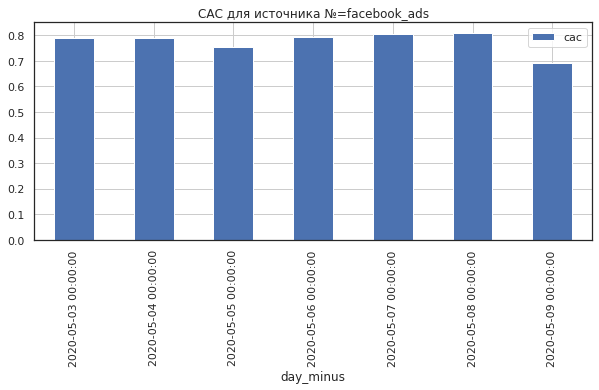

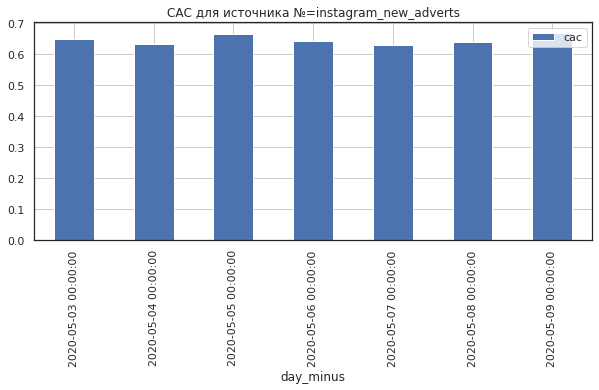

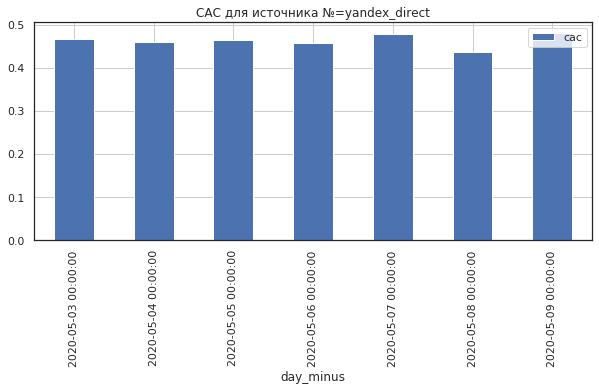

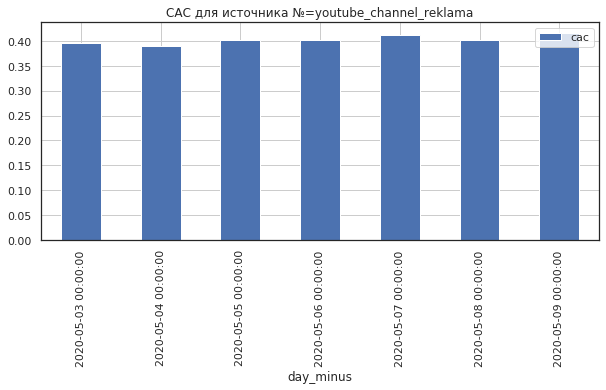

In [80]:
for ad_source in ['facebook_ads', 'instagram_new_adverts', 'yandex_direct', 'youtube_channel_reklama']:
    entry_source_date_query = all_data.query("source == @ad_source")
    entry_source_date_query = entry_source_date_query.groupby(['day_minus']).agg({'user_id' : 'nunique', 'cost' : 'mean'})
    entry_source_date_query['cac'] = entry_source_date_query['cost'] / entry_source_date_query['user_id']
    entry_source_date_query.plot.bar(y = 'cac', title = 'CAC для источника №={}'.format(ad_source), figsize = (10, 4), grid = True)

Анализируя CAC по дням и для каждого источника, можно увидеть, что безусловный лидер по стоимости это фейсбук, самым эффективными источниками оказались ютуб и яндекс. Теперь нужно проверить общий САС за все дни рекламы.

In [81]:
entry_source_date = entry_source_date.reset_index()

In [82]:
# CAC общий по источнику
entry_source = entry_source_date.groupby(['source']).agg({'cac' : 'mean'})

In [83]:
entry_source

,cac
source,
facebook_ads,0.776358
instagram_new_adverts,0.646144
yandex_direct,0.463491
youtube_channel_reklama,0.403225


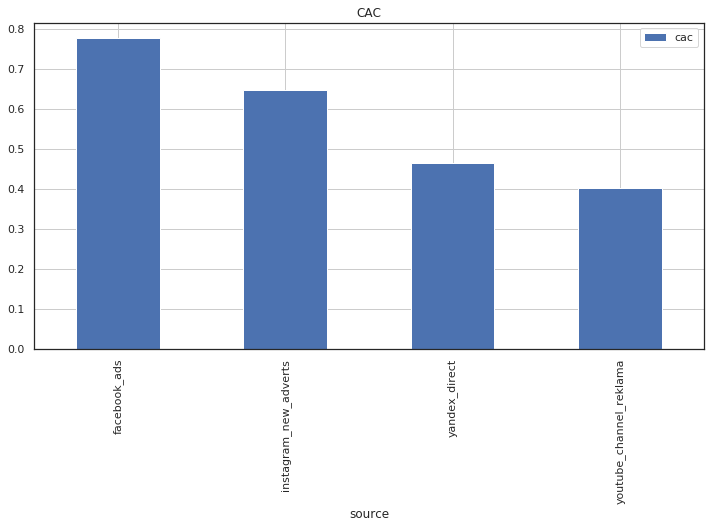

In [84]:
entry_source.plot.bar(y = 'cac', title = 'CAC', figsize = (12, 6), grid = True)

И тут самыми эффективными оказались ютуб и Яндекс. Таким образом, в следующую маркетинговую кампанию стоит увеличить бюджет для Яндекса и ютуба, но снизить для Фейсбука и инстаграма.


Хочется сделать пару примечаний, во-первых, мы начинаем получать данные о игроках только с 2020-05-04, а рекламная кампания началась с 2020-05-03, таким образом нет возможности проанализировать эффективность в этот день. Этот день важен, потому что в этот день стоимость кликов была максимальна, но судя по последующим дням, сомневаюсь, что этот день сильно повлиял бы на конечные выводы.

In [85]:
#Активность игроков во время игрового процесса
#Найдем игроков которые так и не прошли первый уровень
#loser = uni_df.query("event == 'building'")
#loser.set_axis(['user_id', 'loser'], axis = 'columns', inplace = True)
#df_1 = activity_users.merge(loser, on = 'user_id', how = 'left')
#loser_query = loser_df.query("action == 'building' and event != 'finished_stage_1'").reset_index(drop = True)

In [86]:
#Игроки которые победили врага
#df_2 = df_1.merge(uni_df_query, on = 'user_id', how = 'left')

In [87]:
#Игроки завершили проект
#builder = uni_df.query("event == 'building project finished_stage_1'")
#builder.set_axis(['user_id', 'builder'], axis = 'columns', inplace = True)
#data = df_2.merge(builder, on = 'user_id', how = 'left')

In [88]:
uni_df.set_axis(['user_id', 'status'], axis = 'columns', inplace = True)
all_status = activity_users.merge(uni_df, on = 'user_id', how = 'left')

In [89]:
all_status['status'] = all_status['status'].replace("building", "losers")
all_status['status'] = all_status['status'].replace("building finished_stage_1", "warriors")
all_status['status'] = all_status['status'].replace("building project finished_stage_1", "builders")

Мы знаем, что все игроки которые играли в игру, хоть что то построили. Таким образом если у игрока есть только постройка, но нет победы и окончание проекта, значит игрок не прошел первый уровень.

In [90]:
#Сравним 3 типа игроков: Войны(win_en_query), Строители(build_sat) и Проигравшие(loser_query)

buildings = all_status.pivot_table( index = 'status', columns = 'building_type', values = 'user_id', aggfunc = "nunique")

In [91]:
buildings

building_type,assembly_shop,research_center,spaceport
status,,,
builders,1866,1866,1866
losers,7759,3463,7471
warriors,3951,2342,3894


Я посчитал для каждого типа игроков количество зданий построил уникальный пользователь. Пока не понятно с чем сравнивать, нужно смотреть в процентном соотношении.

In [92]:
qnt_players = all_status.pivot_table( index = 'status', values = 'user_id', aggfunc = "nunique")

In [93]:
qnt_players = qnt_players.drop(['status'], axis =1)
qnt_players.set_axis(['total_players'], axis = "columns", inplace = True)
players = buildings.join(qnt_players)

In [94]:
players

,assembly_shop,research_center,spaceport,total_players
status,,,,
builders,1866,1866,1866,1866
losers,7759,3463,7471,7759
warriors,3951,2342,3894,3951


In [95]:
players['assembly_shop_%'] = ((players['assembly_shop'] / players['total_players']) * 100).round()
players['research_center_%'] = ((players['research_center'] / players['total_players']) * 100).round()
players['spaceport_%'] = ((players['spaceport'] / players['total_players']) * 100).round()

In [96]:
players

,assembly_shop,research_center,spaceport,total_players,assembly_shop_%,research_center_%,spaceport_%
status,,,,,,,
builders,1866,1866,1866,1866,100.0,100.0,100.0
losers,7759,3463,7471,7759,100.0,45.0,96.0
warriors,3951,2342,3894,3951,100.0,59.0,99.0


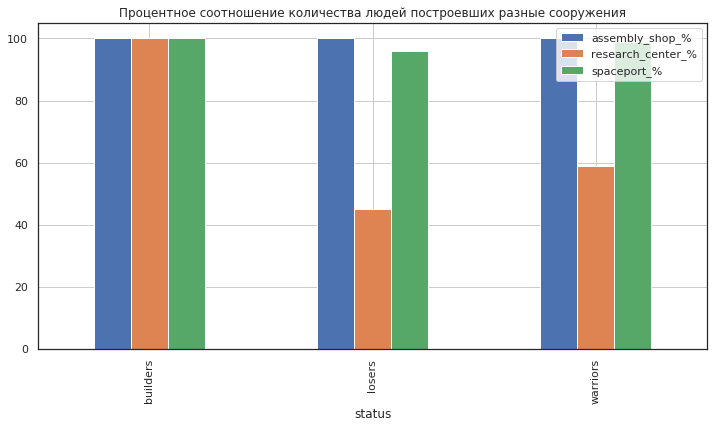

In [97]:
players.plot.bar(y = ['assembly_shop_%', 'research_center_%', 'spaceport_%'],title = 'Процентное соотношение количества людей построевших разные сооружения', figsize = (12, 6), grid = True)

Из таблицы и графиков становится понятным, что все игроки строят сборочный цех, как видно это обязательное действие. Далее мы начинаем видеть, чтоб закончить проект, необходимо построить все здания. Если ты хочешь пройти уровень, через победу над врагом, то можно построить исследовательский центр и пройти уровень, и по желанию космопорт. Интересно, что игроки, не прошедшие первый уровень шли в сторону победы над врагом, потому что очень похожи. Можно сделать предположение, что игрокам, предпочитающим строительство игра цепляет сильней. Также в будущем нужно понять разработчикам, что именно отталкивает людей для продолжения игры через победу над врагом. Это важно, так как многие люди предпочитают играть именно таким образом.

In [98]:
# Различаются ли предпочтение игроков пришедших с разных источников?

In [99]:
source_players = all_status.pivot_table( index = ['status', 'source'], columns = 'building_type', values = 'user_id', aggfunc = "nunique")

In [100]:
source_players

building_type                     assembly_shop  research_center  spaceport
status   source                                                            
builders facebook_ads                       391              391        391
         instagram_new_adverts              476              476        476
         yandex_direct                      620              620        620
         youtube_channel_reklama            379              379        379
losers   facebook_ads                      1576              726       1525
         instagram_new_adverts             1881              854       1814
         yandex_direct                     2775             1248       2679
         youtube_channel_reklama           1527              635       1453
warriors facebook_ads                       759              460        748
         instagram_new_adverts              990              576        978
         yandex_direct                     1422              842       1401
         youtube_channel_reklama            780              464        767

In [101]:
qnt_players_source = all_status.pivot_table(index = ['status', 'source'], values = 'user_id', aggfunc = "nunique")

In [102]:
qnt_players_source = qnt_players_source.drop(['status', 'source'], axis =1)
qnt_players_source.set_axis(['total_players_per_source'], axis = "columns", inplace = True)
players_data = source_players.join(qnt_players_source)

In [103]:
players_data['assembly_shop_%'] = ((players_data['assembly_shop'] / players_data['total_players_per_source']) * 100).round()
players_data['research_center_%'] = ((players_data['research_center'] / players_data['total_players_per_source']) * 100).round()
players_data['spaceport_%'] = ((players_data['spaceport'] / players_data['total_players_per_source']) * 100).round()

In [104]:
players_data

assembly_shop  research_center  spaceport  \
status   source                                                               
builders facebook_ads                       391              391        391   
         instagram_new_adverts              476              476        476   
         yandex_direct                      620              620        620   
         youtube_channel_reklama            379              379        379   
losers   facebook_ads                      1576              726       1525   
         instagram_new_adverts             1881              854       1814   
         yandex_direct                     2775             1248       2679   
         youtube_channel_reklama           1527              635       1453   
warriors facebook_ads                       759              460        748   
         instagram_new_adverts              990              576        978   
         yandex_direct                     1422              842       1401   
         youtube_channel_reklama            780              464        767   

                                  total_players_per_source  assembly_shop_%  \
status   source                                                               
builders facebook_ads                                  391            100.0   
         instagram_new_adverts                         476            100.0   
         yandex_direct                                 620            100.0   
         youtube_channel_reklama                       379            100.0   
losers   facebook_ads                                 1576            100.0   
         instagram_new_adverts                        1881            100.0   
         yandex_direct                                2775            100.0   
         youtube_channel_reklama                      1527            100.0   
warriors facebook_ads                                  759            100.0   
         instagram_new_adverts                         990            100.0   
         yandex_direct                                1422            100.0   
         youtube_channel_reklama                       780            100.0   

                                  research_center_%  spaceport_%  
status   source                                                   
builders facebook_ads                         100.0        100.0  
         instagram_new_adverts                100.0        100.0  
         yandex_direct                        100.0        100.0  
         youtube_channel_reklama              100.0        100.0  
losers   facebook_ads                          46.0         97.0  
         instagram_new_adverts                 45.0         96.0  
         yandex_direct                         45.0         97.0  
         youtube_channel_reklama               42.0         95.0  
warriors facebook_ads                          61.0         99.0  
         instagram_new_adverts                 58.0         99.0  
         yandex_direct                         59.0         99.0  
         youtube_channel_reklama               59.0         98.0

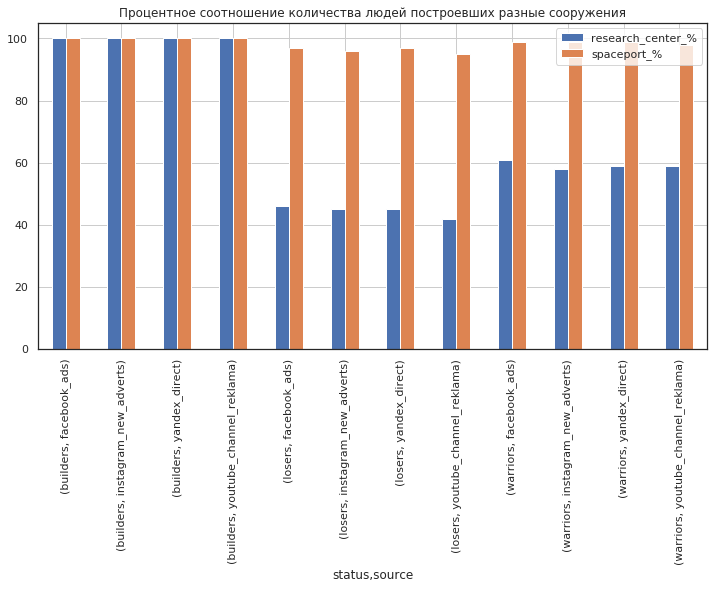

In [105]:
players_data.plot.bar(y = ['research_center_%', 'spaceport_%'],title = 'Процентное соотношение количества людей построевших разные сооружения', figsize = (12, 6), grid = True)

В процентном соотношении предпочтение в строительстве примерно одно и тоже, единственное войны с фейсбука чаще строят космопорт, чем войны из других рекламных источников.

<a id= 'six'></a>

# Дашборд

In [106]:
game_users.to_csv('final_yandex_project.csv', sep='\t', encoding='utf-8')

In [107]:
game_users.head()

,user_id,source,event_datetime,event,building_type,project_type,first_activity_date
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads,2020-05-06 01:07:37,building,assembly_shop,NaN,2020-05-06
1,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads,2020-05-06 11:31:56,building,assembly_shop,NaN,2020-05-06
2,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads,2020-05-06 15:11:50,building,assembly_shop,NaN,2020-05-06
3,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads,2020-05-09 05:59:57,building,assembly_shop,NaN,2020-05-06
4,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads,2020-05-09 07:35:40,building,assembly_shop,NaN,2020-05-06


https://public.tableau.com/views/Yandexfinalproject/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

<a id= 'seven'></a>
# Презентация

https://disk.yandex.ru/i/9R9UjjY-j-aakQ

<a id= 'eight'></a>
# Общий вывод

Подводя итоги всего проекта, можно выделить несколько важных пунктов. Первый пункт, что игра как видно нравится игроку, и в первые пару дней удержание было отличное. Интресено, что коэффициент удержание не зависит от рекламного источника откуда игроки пришли. 43% игроков прошли до следующего уровня, предполагаю, что эти люди могут считаться те, кого игра зацепила. В плане геймплея, игрок может пройти первый уровень двумя способами, или разработка орбитальной сборки спутников или победить врага. В основном игроки предпочитают побеждать врагов, но времени занимает примерно одно и тоже, чтоб закончить уровень.

Второй пункт будет о маркетинге, самое большое количество игроков привлек Яндекс, меньше всех ютуб. Но с точки зрения эффективности, я проверил через метрику CAC, и оказалась, что самая эффективная реклама оказалась у ютуба, а на втором месте яндекс. Таким образом, нужно маркетолог ориентироваться на рекламу в яндексе, и на ютубе. Далее стало понятно, что есть в основном 3 вида игроков, те кто побеждает врага, кто завершает проект и те, кто не проходит первый уровень. Оказалось, что в основном игроки идут по пути завершения уровня через победу над противниками, это можно судить так как относительное количество построенных зданий примерно одинаковое у воителей и те, кто не прошел первый уровень. Таким образом, необходимо понять почему люди бросают на пол пути игры и не побеждают врага. Думаю, дело в геймплее.

Третий пункт будет монетизация, подробно я написал в четвертом шаге. В общем, советую монетизировать в пики удовольствия игрока от игры, например, после завершения строительства, победы, уровня. Далее можно интегрировать бонусы для игрока за просмотр рекламы, что в потенциале не только увеличит прибыль, но и увеличить удержание игрока.


[Наверх](#ten)<a id= 'nine'></a>